# Reconocedor de Animales (Perros)

Vamos a desarrollar una red que reconozca perros. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

'Copia de Sign-Language (1).ipynb'   Train
'Copia de Sign-Language.ipynb'	     Validation


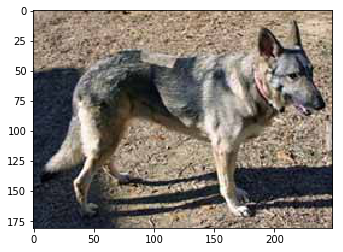

In [18]:
!ls "/content/drive/My Drive/Colab Notebooks/"

from matplotlib.pyplot import imshow 
import numpy as np 
from PIL import Image 

%matplotlib inline 
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/Train/Perros/dog.997.jpg', 'r')
imshow(np.asarray(pil_im))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

# DATA SOURCE --------------------------------------------------

batch_size = 10

train_data_dir = '/content/drive/My Drive/Colab Notebooks/Train' 
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(100, 100),
        batch_size=10,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 30

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=800,
)

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 37s 372ms/step - loss: 0.7045 - acc: 0.5190 - val_loss: 0.6901 - val_acc: 0.5507
Epoch 2/30
100/100 [==============================] - 36s 358ms/step - loss: 0.6914 - acc: 0.5470 - val_loss: 0.6829 - val_acc: 0.6333
Epoch 3/30
100/100 [==============================] - 35s 345ms/step - loss: 0.6890 - acc: 0.6060 - val_loss: 0.6537 - val_acc: 0.6634
Epoch 4/30
100/100 [==============================] - 36s 357ms/step - loss: 0.6787 - acc: 0.6060 - val_loss: 0.6302 - val_acc: 0.6499
Epoch 5/30
100/100 [==============================] - 34s 344ms/step - loss: 0.6418 - acc: 0.6230 - val_loss: 0.6417 - val_acc: 0.6415
Epoch 6/30
100/100 [==============================] - 34s 344ms/step - loss: 0.6211 - acc: 0.6590 - val_loss: 0.6638 - val_acc: 0.5934
Epoch 7/30
100/100 [==============================] - 35s 354ms/step - loss: 0.6348 - acc: 0.6250 - val_lo